## Soft Margin Linear SVM by optimizing Hinge Loss Objective (with L2 regularization on weights)

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating Synthetic Data

In [2]:
np.random.seed(0)

cluster_negative = np.random.randn(20, 2) - np.array([2, 2])
cluster_positive = np.random.randn(20, 2) + np.array([2, 2])

X = np.vstack([cluster_negative, cluster_positive])
y = np.hstack([np.full(20, -1), np.full(20, 1)])

### SVM Model with Hinge Loss

In [3]:
def compute_hinge_loss(w, X, y, reg_param):
    margins = 1 - y * X.dot(w)
    loss = np.maximum(0, margins)
    return np.mean(loss) + 0.5 * reg_param * np.sum(w ** 2)

### Gradient Definiton

In [4]:
def compute_hinge_gradient(w, X, y, reg_param):
    num_samples = X.shape[0]
    
    scores = X.dot(w)
    margins = 1 - y * scores
    
    active = (margins > 0).astype(float)
    weighted_samples = (active * y).reshape(-1, 1) * X
    data_grad = -np.sum(weighted_samples, axis=0) / num_samples
    
    reg_grad = reg_param * w
    total_grad = data_grad + reg_grad
    
    return total_grad

### Gradient Descent

In [5]:
def svm_gradient_descent(X, y, learning_rate, reg_param, num_epochs):
    w = np.zeros(X.shape[1])
    losses = []

    for _ in range(num_epochs):
        loss = compute_hinge_loss(w, X, y, reg_param)
        grad = compute_hinge_gradient(w, X, y, reg_param)
        w -= learning_rate * grad
        losses.append(loss)

    return w, losses

### Training SVM

In [6]:
learning_rate = 0.01
reg_param = 0.1
num_epochs = 1000

weights, losses = svm_gradient_descent(X, y, learning_rate, reg_param, num_epochs)

### Margin Calculation and Decision Boundary Visualization

Margin: 1.1118043232503123


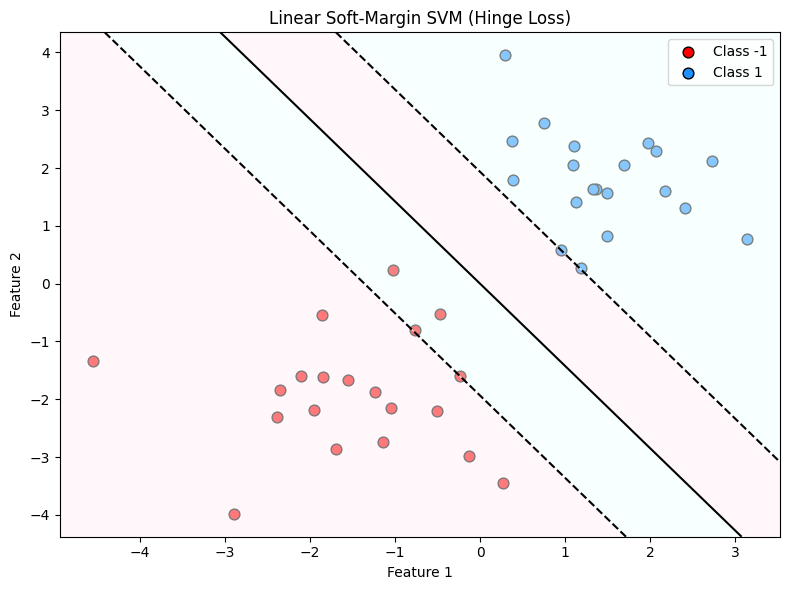

In [32]:
# Calculate the margin
margin = 1 / np.linalg.norm(w)
print("Margin:", margin)

neg_class_color = "red"   # for negative class points
pos_class_color = "dodgerblue"   # for positive class points
neg_region_color = "lavenderblush"  # for negative region
pos_region_color = "azure"  # for positive region
margin_region_color = "azure"  # for margin region
margin_line_colors = ['black', 'black', 'black']  # colors for margin lines

plt.figure(figsize=(8, 6))

for label, color in zip([-1, 1], [neg_class_color, pos_class_color]):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=color, edgecolors='k', s=60, label=f'Class {label}')

ax = plt.gca()
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

xx, yy = np.meshgrid(
    np.linspace(x_limits[0], x_limits[1], 500),
    np.linspace(y_limits[0], y_limits[1], 500)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = grid_points.dot(w).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-np.inf, -1, 0, 1, np.inf],
             colors=[neg_region_color, pos_region_color, neg_region_color, margin_region_color],
             alpha=0.5)

plt.contour(xx, yy, Z, levels=[-1, 0, 1],
            colors=margin_line_colors,
            linestyles=['--', '-', '--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Soft-Margin SVM (Hinge Loss)')
plt.legend()
plt.tight_layout()
plt.show()